In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# The Data

In [2]:
df = pd.read_csv('/content/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


# Exploratory Data Analysis

In [4]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10163,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10164,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10165,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.016700e+04,1.016700e+04,10167.000000,10167.000000,10167.000000,1.016700e+04,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10166.000000,10166.000000,10166.000000,10166.000000,10166.000000,10166.000000,10166.000000,10166.000000,10166.000000
mean,4.548337e+09,5.329561e+05,3.365004,2.063023,2052.634504,1.595853e+04,1.431396,0.007869,0.237828,3.447625,7.594964,1749.755066,302.882648,1967.276903,91.117942,98077.891403,47.559933,-122.214373,1975.557643,13312.919536
std,2.863915e+09,3.752697e+05,0.909351,0.763764,909.187219,4.473901e+04,0.511514,0.088360,0.765356,0.665754,1.162993,809.077446,450.925493,27.973516,416.688101,53.905439,0.140038,0.139204,671.403613,27184.580893
min,1.000102e+06,8.000000e+04,1.000000,0.500000,380.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.113701e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.442500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.462325,-122.326000,1490.000000,5428.750000
50%,3.905010e+09,4.465000e+05,3.000000,2.000000,1890.000000,7.912000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573200,-122.230000,1830.000000,7842.000000
75%,7.276100e+09,6.390000e+05,4.000000,2.500000,2500.000000,1.116900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679500,-122.126000,2340.000000,10374.000000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10167.0,4.548337e+09,2.863915e+09,1.000102e+06,2.113701e+09,3.905010e+09,7.276100e+09,9.842301e+09
price,10167.0,5.329561e+05,3.752697e+05,8.000000e+04,3.150000e+05,4.465000e+05,6.390000e+05,7.700000e+06
bedrooms,10167.0,3.365004e+00,9.093514e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01
bathrooms,10167.0,2.063023e+00,7.637635e-01,5.000000e-01,1.500000e+00,2.000000e+00,2.500000e+00,8.000000e+00
sqft_living,10167.0,2.052635e+03,9.091872e+02,3.800000e+02,1.410000e+03,1.890000e+03,2.500000e+03,1.205000e+04
sqft_lot,10167.0,1.595853e+04,4.473901e+04,5.720000e+02,5.442500e+03,7.912000e+03,1.116900e+04,1.651359e+06
floors,10167.0,1.431396e+00,5.115139e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.500000e+00
waterfront,10167.0,7.868594e-03,8.835976e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,10167.0,2.378283e-01,7.653557e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,10167.0,3.447625e+00,6.657540e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Figure size 1000x600 with 0 Axes>

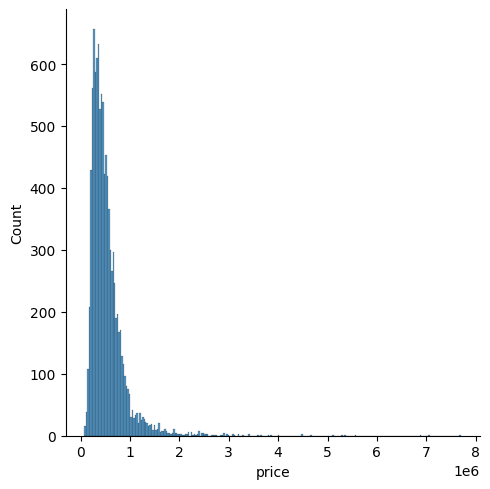

<Figure size 1000x600 with 0 Axes>

In [8]:
sns.displot(df['price'])
plt.figure(figsize=(10,6))

<Axes: ylabel='count'>

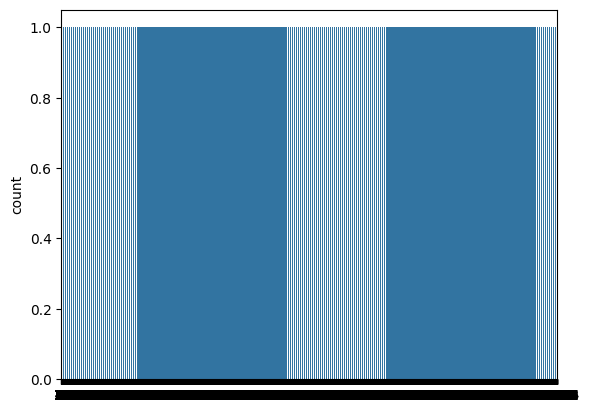

In [9]:
sns.countplot(df['bedrooms'])

In [10]:
df_without_date = df.drop(columns=['date'])  # Extracting the 'date' column
correlation_matrix = df_without_date.corr()  # Correlation

In [11]:
print(correlation_matrix)

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.006422  0.011648   0.007187     0.001836 -0.131433   
price          0.006422  1.000000  0.299878   0.521083     0.700859  0.091308   
bedrooms       0.011648  0.299878  1.000000   0.538677     0.578312  0.029011   
bathrooms      0.007187  0.521083  0.538677   1.000000     0.766225  0.091541   
sqft_living    0.001836  0.700859  0.578312   0.766225     1.000000  0.168169   
sqft_lot      -0.131433  0.091308  0.029011   0.091541     0.168169  1.000000   
floors         0.012948  0.276199  0.219743   0.499504     0.392752  0.022031   
waterfront    -0.005910  0.295175 -0.007591   0.080107     0.119575  0.024192   
view           0.035768  0.398925  0.091504   0.206833     0.292986  0.064249   
condition     -0.019825  0.043933  0.019801  -0.091758    -0.048618 -0.019897   
grade          0.013974  0.648780  0.362757   0.660553     0.761980  0.122485   
sqft_above    -0.006283  0.6

In [12]:
df_without_date.corr()['price']

,price
id,0.006422
price,1.000000
bedrooms,0.299878
bathrooms,0.521083
sqft_living,0.700859
sqft_lot,0.091308
floors,0.276199
waterfront,0.295175
view,0.398925
condition,0.043933


In [13]:
df_without_date.corr()['price'].sort_values()

,price
zipcode,-0.053018
id,0.006422
long,0.015688
yr_built,0.035349
condition,0.043933
sqft_lot15,0.087697
sqft_lot,0.091308
yr_renovated,0.142114
floors,0.276199
waterfront,0.295175


<Axes: xlabel='price', ylabel='price'>

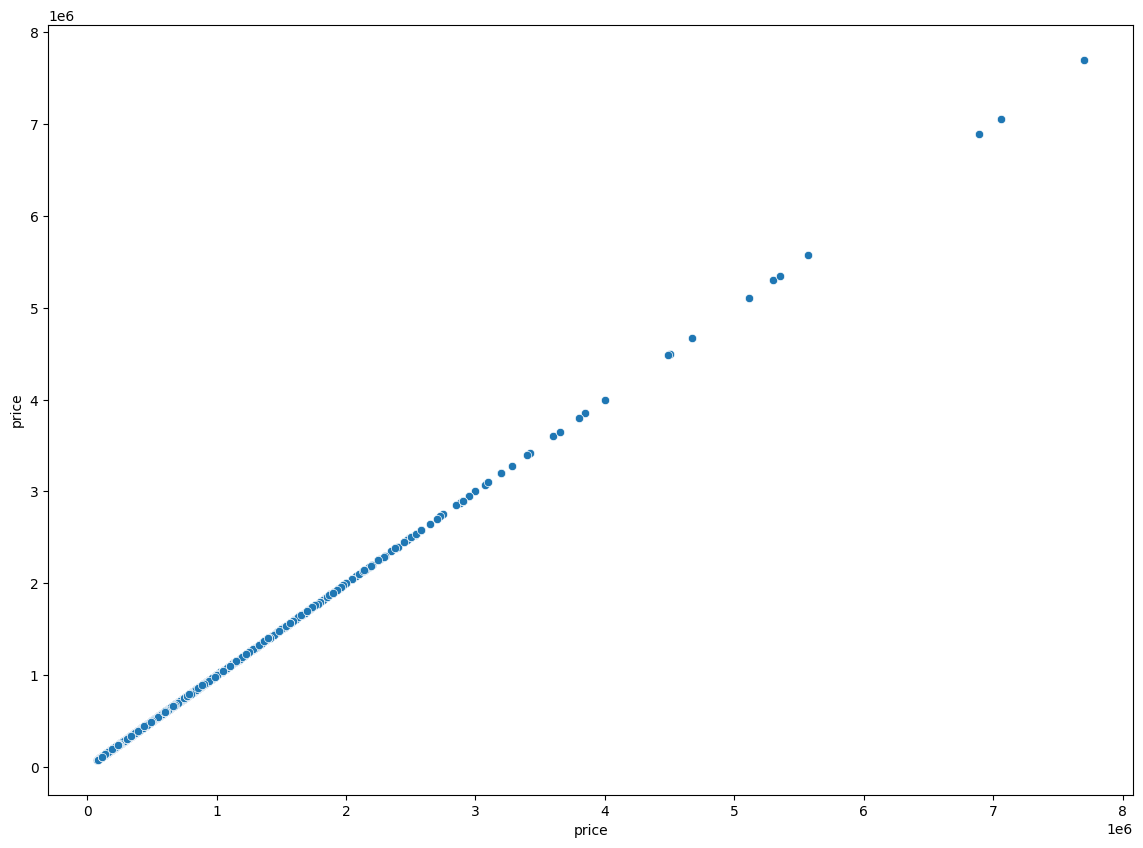

In [14]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='price', y='price', data=df)

<Axes: xlabel='price', ylabel='sqft_living'>

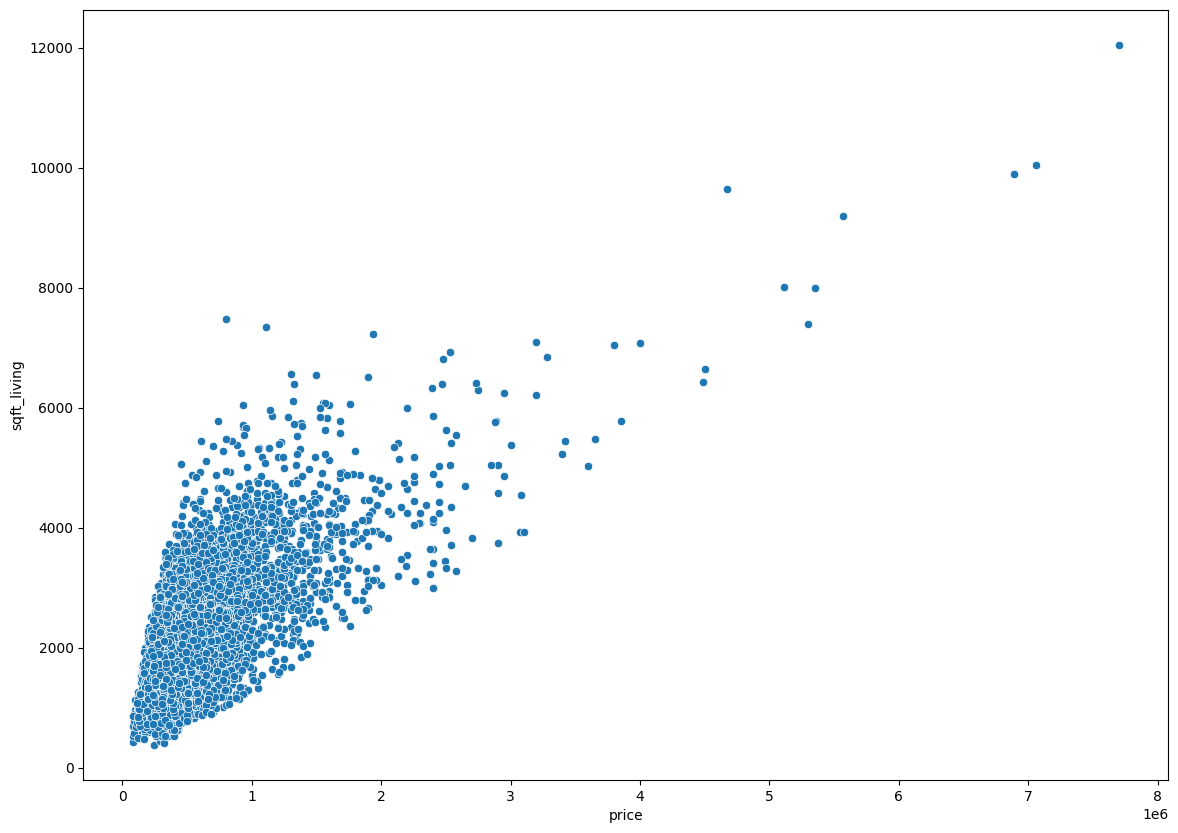

In [15]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='price', y='sqft_living', data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

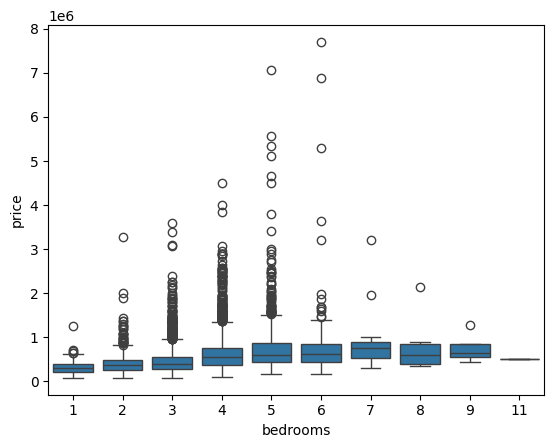

In [16]:
sns.boxplot(x='bedrooms', y='price', data=df)

<Axes: xlabel='price', ylabel='long'>

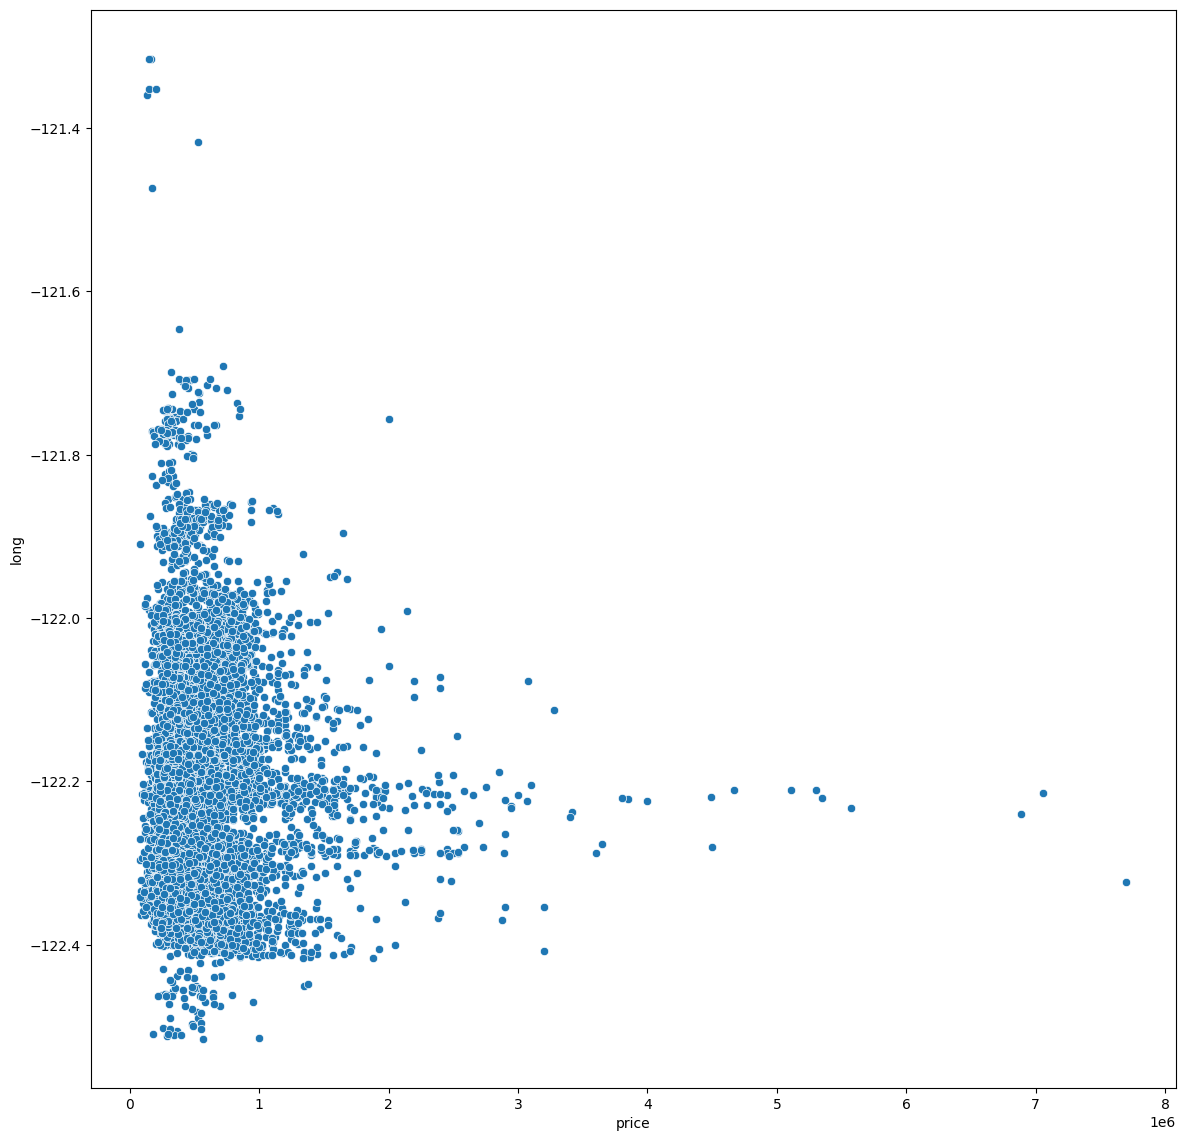

In [17]:
plt.figure(figsize=(14,14))
sns.scatterplot(x='price',y='long',data=df)

<Axes: xlabel='price', ylabel='lat'>

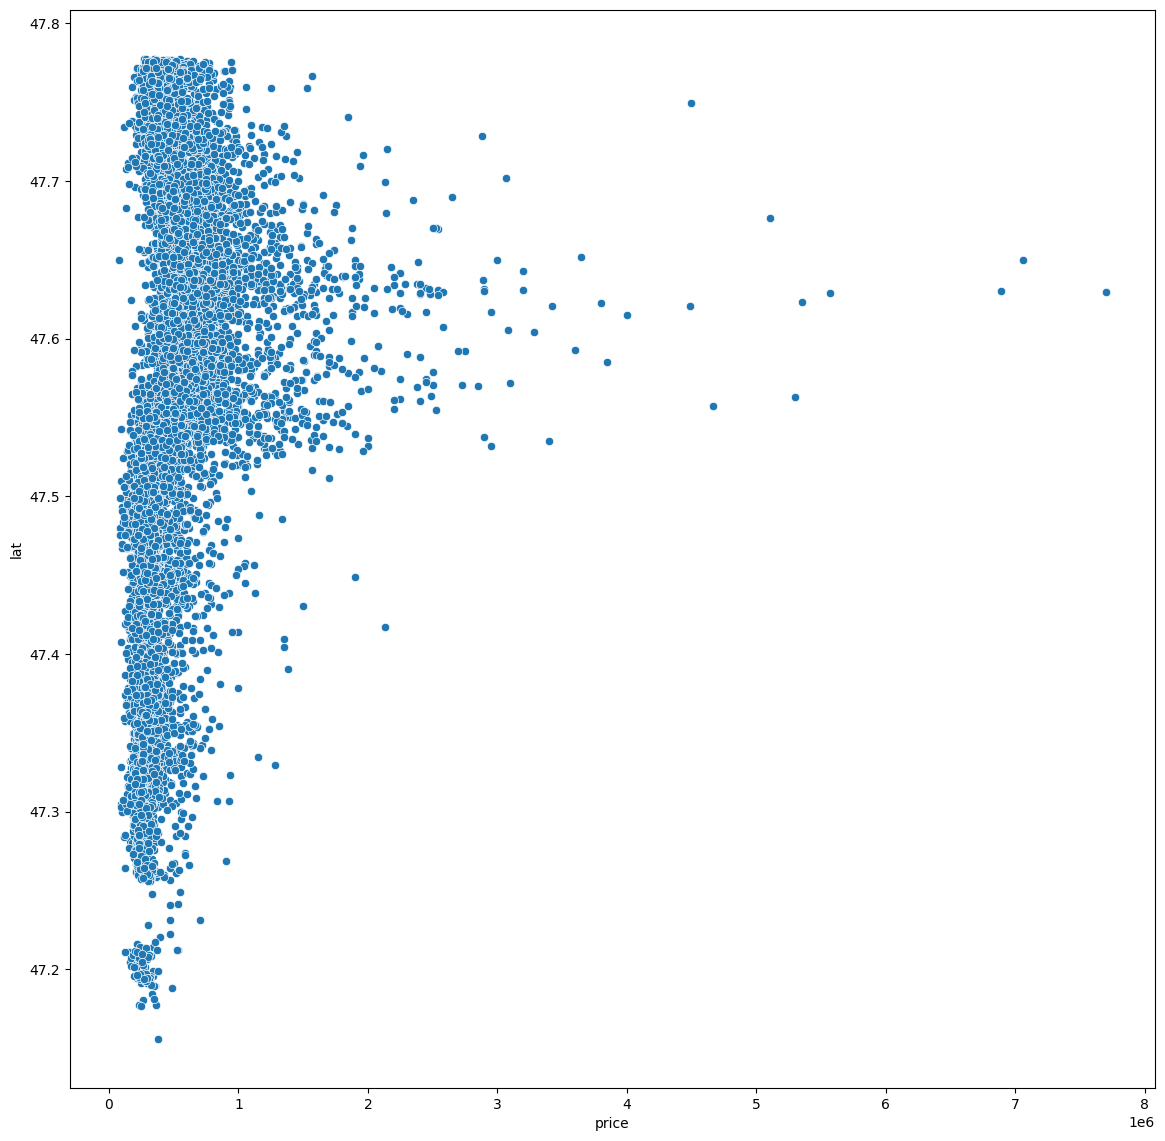

In [18]:
plt.figure(figsize=(14,14))
sns.scatterplot(x='price',y='lat',data=df)

<Axes: xlabel='long', ylabel='lat'>

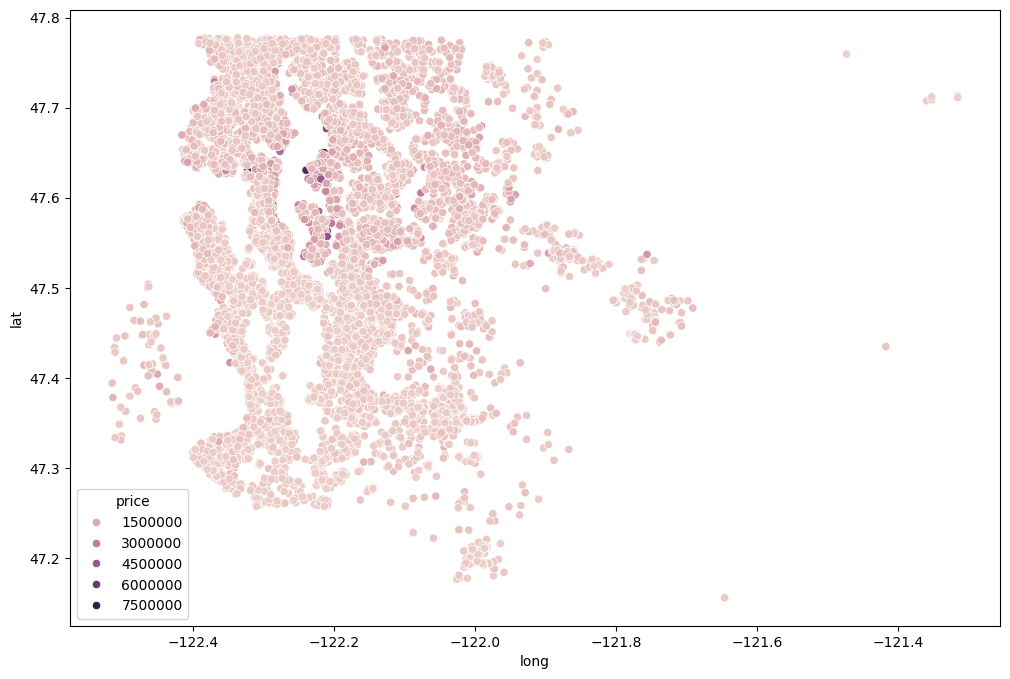

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [20]:
df.sort_values('price', ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570.0,3480.0,1910.0,1987.0,98102.0,47.6298,-122.323,3940.0,8800.0
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680.0,2360.0,1940.0,2001.0,98004.0,47.6500,-122.214,3930.0,25449.0
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860.0,1030.0,2001.0,0.0,98039.0,47.6305,-122.240,4540.0,42730.0
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200.0,3000.0,2001.0,0.0,98039.0,47.6289,-122.233,3560.0,24345.0
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720.0,1280.0,2009.0,0.0,98004.0,47.6232,-122.220,4600.0,21750.0
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000.0,2390.0,1991.0,0.0,98040.0,47.5631,-122.210,4320.0,24619.0
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990.0,2020.0,1999.0,0.0,98033.0,47.6767,-122.211,3430.0,26788.0
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820.0,4820.0,1983.0,2009.0,98040.0,47.5570,-122.210,3270.0,10454.0
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350.0,290.0,2004.0,0.0,98155.0,47.7493,-122.280,3030.0,23408.0
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430.0,0.0,2001.0,0.0,98004.0,47.6208,-122.219,3720.0,14592.0


In [21]:
len(df) # Number of houses in our dataframe

10167

In [22]:
len(df)*0.01

101.67

In [23]:
non_top_one_percent = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

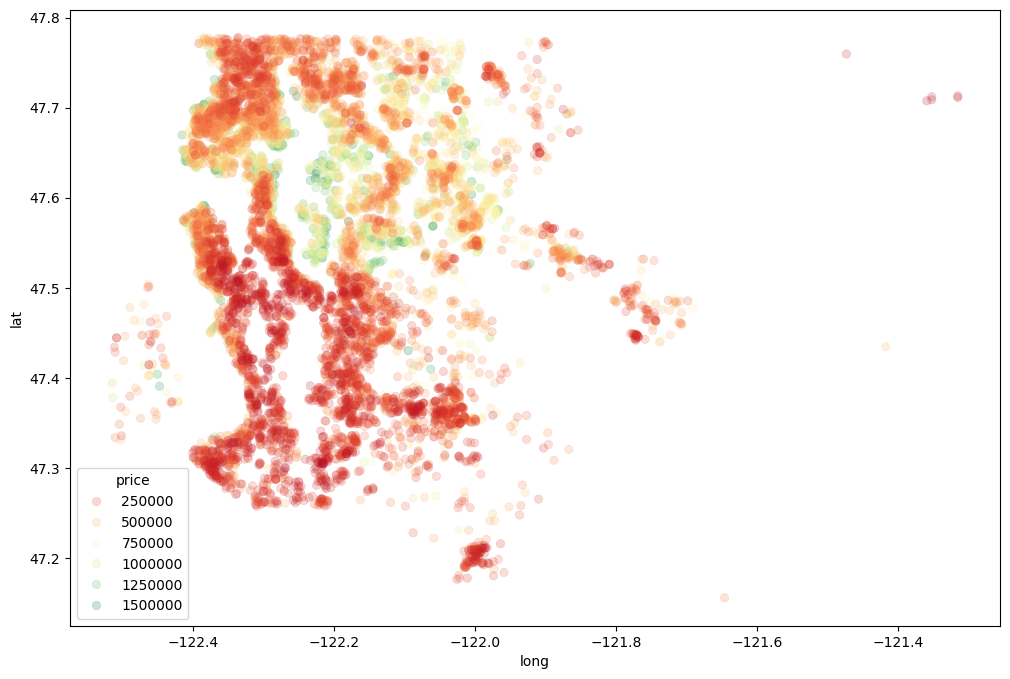

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_one_percent,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

<Axes: xlabel='waterfront', ylabel='price'>

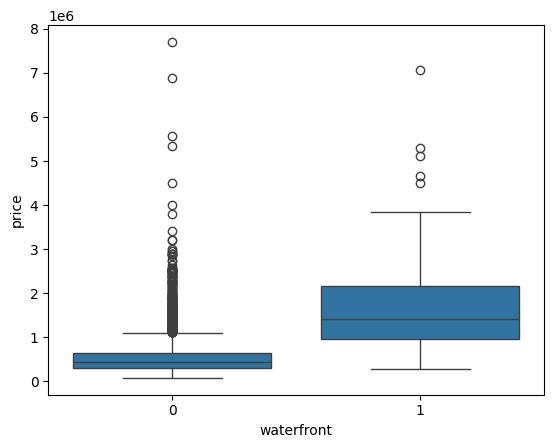

In [25]:
sns.boxplot(x='waterfront',y='price',data=df)

In [26]:
df.head(8)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930.0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715.0,0.0,1995.0,0.0,98003.0,47.3097,-122.327,2238.0,6819.0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060.0,0.0,1963.0,0.0,98198.0,47.4095,-122.315,1650.0,9711.0


In [27]:
df = df.drop('id',axis=1)

In [28]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


# Feature Engineering

In [29]:
df['date'] = pd.to_datetime(df['date'])

In [30]:
df['date']

,date
0,2014-10-13
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18
...,...
10162,2014-06-13
10163,2015-03-19
10164,2014-12-17
10165,2015-01-05


In [31]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
# def extract_year(date):
  # return date.year

In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,2015,2


<Axes: xlabel='month', ylabel='price'>

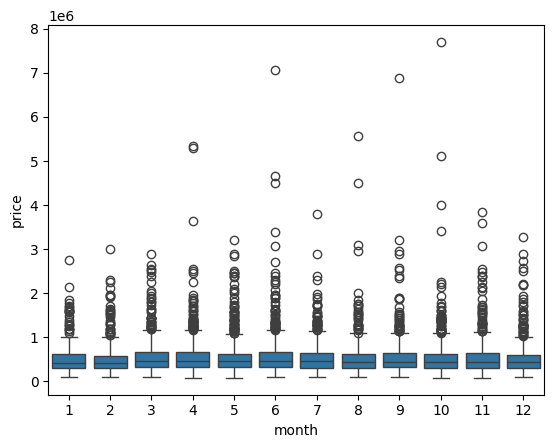

In [34]:
sns.boxplot(x='month', y='price', data=df)

In [35]:
df.groupby('month').mean()['price']

,price
month,
1,504714.700000
2,498232.754153
3,545253.031603
4,558192.105163
5,529319.780000
6,555792.323782
7,528393.115900
8,514008.996556
9,531300.968858


<Axes: xlabel='month'>

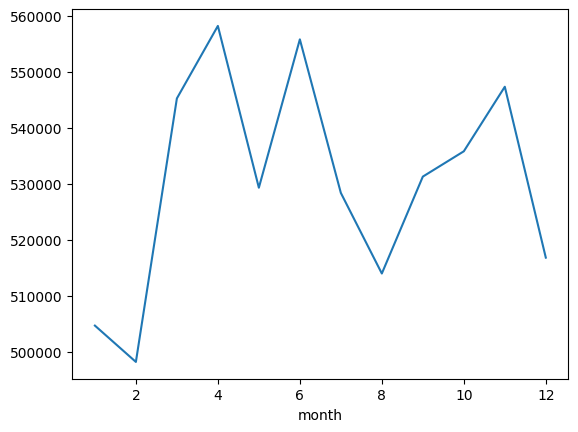

In [36]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

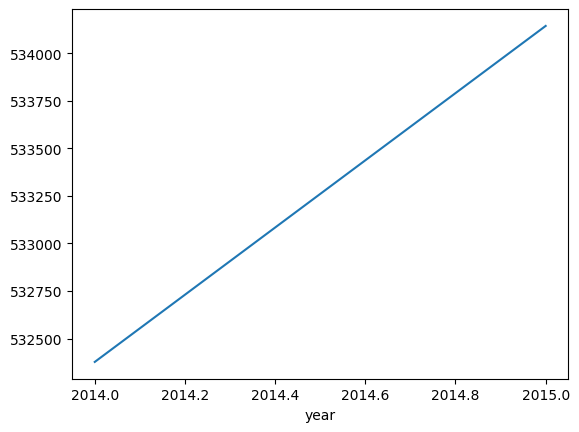

In [37]:
df.groupby('year').mean()['price'].plot()

In [ ]:
#df = df.drop('date',axis=1)

In [42]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,2015,2


In [43]:
df = df.drop('month',axis=1)

In [44]:
df = df.drop('year',axis=1)

In [45]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [46]:
df['zipcode'].value_counts()

,count
zipcode,
98038.0,281
98052.0,281
98115.0,276
98034.0,274
98117.0,266
...,...
98109.0,48
98024.0,47
98102.0,45


In [47]:
df = df.drop('zipcode',axis=1)

In [48]:
df['yr_renovated'].value_counts()

,count
yr_renovated,
0.0,9702
2014.0,54
2005.0,23
2013.0,21
2003.0,20
...,...
1956.0,1
1976.0,1
1946.0,1


In [49]:
df['sqft_basement'].value_counts()

,count
sqft_basement,
0.0,6092
700.0,110
500.0,109
600.0,109
400.0,103
...,...
1960.0,1
588.0,1
1810.0,1


# Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [69]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

In [73]:
X_train = scaler.fit_transform(X_train)

In [74]:
X_test = scaler.transform(X_test)

In [75]:
X_train.shape

(7116, 17)

In [76]:
X_test.shape

(3051, 17)

In [84]:
# Check for NaN values
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))

# Check for infinite values
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

True
False
False
False


In [86]:
# Filling with Median

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)

# Model

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [88]:
model = Sequential()

model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

**Training**

In [89]:
model.fit(x = X_train, y = y_train,
          validation_data = (X_test, y_test),
          batch_size=128, epochs=400)

Epoch 1/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 423744471040.0000 - val_loss: 410390921216.0000
Epoch 2/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 408482807808.0000 - val_loss: 410347274240.0000
Epoch 3/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 422876250112.0000 - val_loss: 410013466624.0000
Epoch 4/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 429518782464.0000 - val_loss: 408551555072.0000
Epoch 5/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 408839749632.0000 - val_loss: 404038549504.0000
Epoch 6/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 450137718784.0000 - val_loss: 393229598720.0000
Epoch 7/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 433505501184.0000 - val_loss: 371779534848.0000
Epoch 8/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 405324365824.0000 - val_loss: 335190786048.0000
Epoch 9/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 363560599552.0000 - val_loss: 281835896832.0000
Epoch 10/400
56/56 ━━━━━━━━━━━━━━━━━━

# Evaluation on the Test Data

In [92]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.310555e+11,4.103909e+11
1,4.310402e+11,4.103473e+11
2,4.308915e+11,4.100135e+11
3,4.301113e+11,4.085516e+11
4,4.273408e+11,4.040385e+11
...,...,...
395,3.211492e+10,3.000618e+10
396,3.206495e+10,2.992860e+10
397,3.207863e+10,3.014874e+10
398,3.208317e+10,2.995846e+10


In [93]:
losses = pd.DataFrame(model.history.history)

<Axes: >

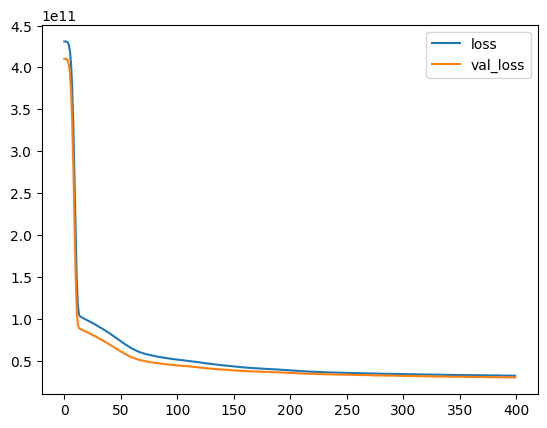

In [94]:
losses.plot()

In [95]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [96]:
print(X_test)

[[0.125      0.06896552 0.12836439 ... 0.2375     0.35589942 0.00552416]
 [0.25       0.06896552 0.07039337 ... 0.28083333 0.24758221 0.00610081]
 [0.375      0.20689655 0.18115942 ... 0.14083333 0.13733075 0.0023652 ]
 ...
 [0.375      0.06896552 0.11283644 ... 0.18833333 0.11798839 0.00633515]
 [0.25       0.17241379 0.14078675 ... 0.1125     0.26305609 0.00914949]
 [0.5        0.27586207 0.36335404 ... 0.12666667 0.49129594 0.02524984]]


In [97]:
predictions = model.predict(X_test)

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [98]:
mean_absolute_error(y_test,predictions)

112806.52431707842

In [99]:
np.sqrt(mean_squared_error(y_test,predictions))

173077.79492210073

In [101]:
df['price'].mean()

532956.0722927117

In [102]:
explained_variance_score(y_test,predictions)

0.7687588558356999

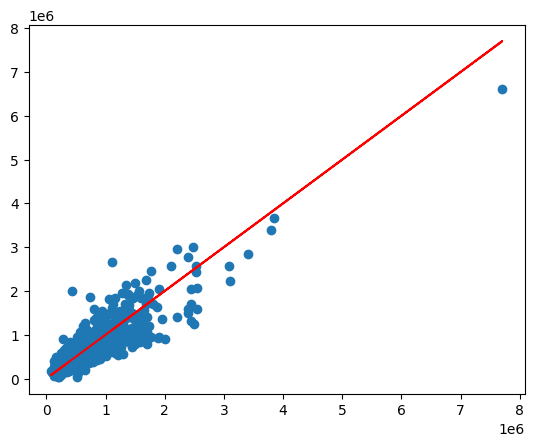

In [103]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [106]:
errors = y_test.reshape(3051, 1) - predictions

<ipython-input-107-4a151ca7bc24>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: ylabel='Density'>

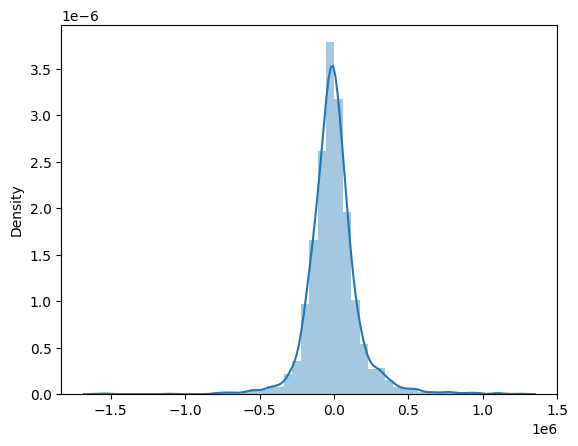

In [107]:
sns.distplot(errors)

# Predicting on a Brand New House

In [108]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0.0,1955.0,0.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400.0,1951.0,1991.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0.0,1933.0,0.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910.0,1965.0,0.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0.0,1987.0,0.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,890000.0,4,2.25,2770,13500,2.0,0,0,3,8,2770.0,0.0,1974.0,0.0,47.5430,-122.231,2300.0,13500.0
10163,235000.0,3,1.00,1864,6978,1.0,0,0,4,7,1864.0,0.0,1958.0,0.0,47.2850,-122.206,990.0,8000.0
10164,495000.0,4,1.75,1930,6720,1.0,0,2,3,8,1130.0,800.0,1959.0,0.0,47.6935,-122.312,1850.0,6380.0
10165,600000.0,4,2.50,3870,50965,2.0,0,0,3,10,3870.0,0.0,2007.0,0.0,47.3109,-122.045,2170.0,65843.0


In [109]:
df.drop('price', axis=1).iloc[0]

,0
bedrooms,3.0000
bathrooms,1.0000
sqft_living,1180.0000
sqft_lot,5650.0000
floors,1.0000
waterfront,0.0000
view,0.0000
condition,3.0000
grade,7.0000
sqft_above,1180.0000


In [123]:
single_house = df.drop('price',axis=1).iloc[0]

In [124]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03])

In [125]:
single_house = scaler.transform(single_house.values.reshape(-1, 17))

In [126]:
single_house

array([[0.25      , 0.06896552, 0.08281573, 0.00307611, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.09433962,
        0.        , 0.47826087, 0.        , 0.55688623, 0.215     ,
        0.13926499, 0.00573207]])

In [127]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[289429.94]], dtype=float32)

In [128]:
df.iloc[0]

,0
price,221900.0000
bedrooms,3.0000
bathrooms,1.0000
sqft_living,1180.0000
sqft_lot,5650.0000
floors,1.0000
waterfront,0.0000
view,0.0000
condition,3.0000
grade,7.0000


In [129]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180.0,0.0,1955.0,0.0,47.5112,-122.257,1340.0,5650.0
